# Lesson 1: Text Basics: Tokenisation, n‑grams, Frequencies

**Goal:** build intuition by tokenising text, making n‑grams, and plotting frequencies on a ~50‑sentence business dataset.



> You'll fill in the `# TODO` parts while sharing your screen.

In [4]:
!which python

/Users/ryangael/Documents/AI&ML Lessons/Lesson 1/venv/bin/python


In [5]:
!python -m pip show pandas

In [6]:
!python -m pip install -U pip

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [13]:
!python -m pip install pandas

In [14]:
!python -m pip install matplotlib

  Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.1 MB/s  0:00:02 eta 0:00:01
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotl

In [8]:
import pandas as pd
texts = ['The new ERP rollout improved our monthly reporting speed by 40 percent.', 'Customer support response time is slow but the knowledge base is helpful.', 'Weekly sales increased after the email campaign and discount codes.', 'Our invoice reconciliation still takes too long despite the automation.', 'The dashboard is clean, but export to Excel sometimes breaks.', 'Warehouse picking errors dropped once barcodes were introduced.', 'Marketing wants a way to tag and search proposals across clients.', 'Cash flow forecasting is better, although the model drifts each quarter.', 'We migrated the CRM without issues; user training was the hardest part.', 'Late supplier deliveries cause stockouts and unhappy customers.', 'Finance wants to compare actuals vs budget by region on one page.', 'Legal needs a quick search for similar contract clauses.', 'The Slack bot that summarizes meetings saves everyone time.', 'Holiday season traffic overloaded our API rate limits last year.', 'Managers ask for a weekly PDF with key KPIs and anomalies.', 'Sales reps complain that leads are stale by the time they call.', 'The procurement team built a simple approval workflow in Sheets.', 'Our service desk tickets spike after each product release.', 'The BI team wants ownership of all production dashboards.', 'We track NPS monthly but the comments are hard to triage.', 'Accounting wants to tag expenses with project codes automatically.', 'The logistics team wants a daily SMS when shipments are delayed.', 'Retail partners send price lists in different formats every quarter.', "The HR portal search is poor; people can't find policies quickly.", 'Website conversions improved when we simplified the checkout page.', 'Security wants automated alerts for suspicious logins out of hours.', 'The pricing model needs to factor in currency volatility.', 'Suppliers keep changing SKUs which breaks our catalog import.', 'Revenue operations wants one source of truth for pipeline stages.', 'The help center needs a better way to surface duplicate questions.', 'Users asked for dark mode and better keyboard shortcuts.', 'We should archive old contracts and keep only the latest version.', 'The forecasting spreadsheet crashes when the dataset exceeds 50k rows.', 'QA wants a daily digest of failed test cases grouped by component.', 'The field sales team needs offline access to the product brochure.', 'The team wants to track trial-to-paid conversion by cohort.', 'Data entry errors happen when people copy from PDFs into Excel.', 'Projects get delayed because stakeholders approve documents late.', 'We need a faster way to find similar customer complaints.', 'Finance wants bank feeds to reconcile automatically overnight.', 'The board pack preparation takes three days every month.', 'The SEO team wants to compare rankings by region and device.', 'The training team needs a library of reusable lesson templates.', 'Warehouse staff want to scan returns and print labels in one step.', 'Customer success wants churn risk scores inside the CRM.', 'Support needs a smart reply assistant for common questions.', 'The expense policy changed; employees need an easy explainer.', 'Legal wants a tool to search for similar indemnity clauses.', 'IT wants a report of unused SaaS seats to reduce costs.', 'Partners ask for a portal to check order status in real time.']

In [9]:
STOPWORDS = {
    'the','a','an','and','or','but','to','of','in','on','for','by','with','is','are','was','were',
    'our','we','it','that','this','those','these','as','at','from','without','once','each','across',
    'still','too','vs','one','last','year','sometimes','once','although','over','into','out','when',
    'every','very','out','off','after','before','can','t','s','re','ll','d','should','could','would'
}


In [ ]:
import re
from collections import Counter
from itertools import islice

def clean_text(text: str) -> str: #clean the text.
    text = text.lower() #make the text lowercase.
    text = re.sub(r"[^a-z\s]", " ", text) #remove everything that is not between a-z.
    text = re.sub(r"\s+", " ", text).strip() #everythin more than one space replace by one splace.
    return text

def tokenize(text: str): #tokenize th text.
    tokens = text.split() #split the text into tokens.
    return [t for t in tokens if t not in STOPWORDS] #remove stopwords.

def make_ngrams(tokens, n=2): #make the ngrams.
    return list(zip(*[tokens[i:] for i in range(n)])) #zip the tokens together.

def top_n(counter: Counter, n=15): #get the top n.
    return list(islice(counter.most_common(), n)) #return the top n. 


In [15]:
import matplotlib.pyplot as plt

def plot_bar(items, title, xlabel, ylabel):
    labels = [' '.join(k) if isinstance(k, tuple) else k for k, _ in items]
    counts = [v for _, v in items]
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(range(len(labels)), counts)
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 1) DataFrame

In [18]:
df = pd.DataFrame({'text': texts})  #TO DO: load into pandas dataframe
df.head()

,text
0,The new ERP rollout improved our monthly repor...
1,Customer support response time is slow but the...
2,Weekly sales increased after the email campaig...
3,Our invoice reconciliation still takes too lon...
4,"The dashboard is clean, but export to Excel so..."


## 2) Clean + tokenize

In [20]:
df['tokens'] = df['text'].apply(lambda x: tokenize(clean_text(x))) # TO DO: tokenize the cleaned text 
df[['text','tokens']].head()

,text,tokens
0,The new ERP rollout improved our monthly repor...,"[new, erp, rollout, improved, monthly, reporti..."
1,Customer support response time is slow but the...,"[customer, support, response, time, slow, know..."
2,Weekly sales increased after the email campaig...,"[weekly, sales, increased, email, campaign, di..."
3,Our invoice reconciliation still takes too lon...,"[invoice, reconciliation, takes, long, despite..."
4,"The dashboard is clean, but export to Excel so...","[dashboard, clean, export, excel, breaks]"


## 3) Unigram frequencies + plot

In [21]:
from collections import Counter
all_tokens = sum(df['tokens'].tolist(), [])
uni_counts = Counter(all_tokens)
top_uni = top_n(uni_counts, 15)
top_uni[:5]

[('wants', 14), ('team', 7), ('needs', 6), ('time', 4), ('search', 4)]

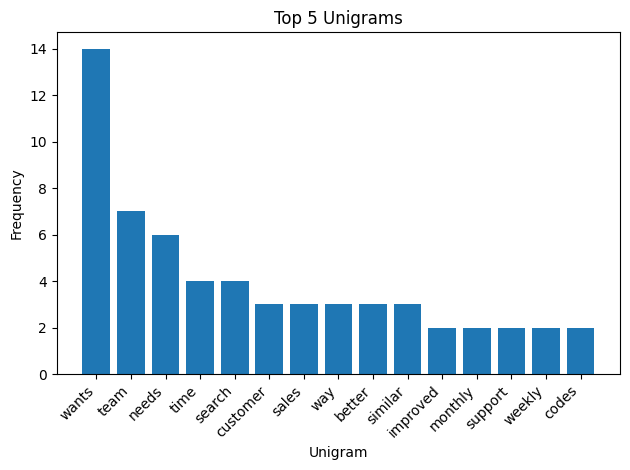

In [22]:
plot_bar(top_uni, "Top 5 Unigrams", "Unigram", "Frequency")

## 4) Bigrams & trigrams

In [23]:
from collections import Counter
bigram_counts = Counter()
for toks in df['tokens']:
    bigs = make_ngrams(toks, 2)
    bigram_counts.update(bigs)

top_bi = top_n(bigram_counts, 15)
top_bi[:5]

[(('team', 'wants'), 4),
 (('finance', 'wants'), 2),
 (('wants', 'compare'), 2),
 (('search', 'similar'), 2),
 (('wants', 'daily'), 2)]

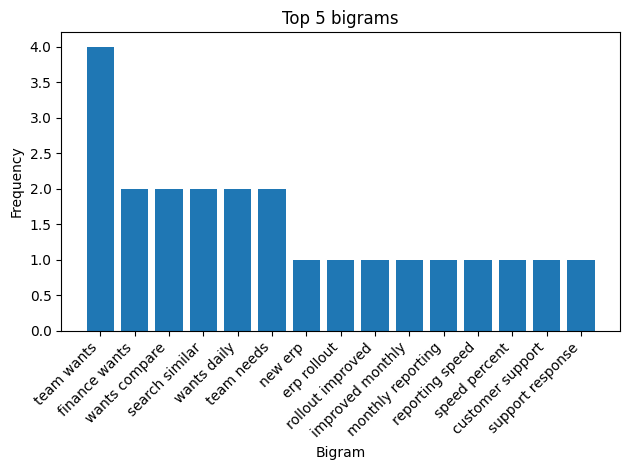

In [24]:
plot_bar(top_bi, "Top 5 bigrams", "Bigram", "Frequency")

In [25]:
trigram_counts = Counter()
for toks in df['tokens']:
    tris = make_ngrams(toks, 3)
    trigram_counts.update(tris)

top_tri = top_n(trigram_counts, 15)
top_tri[:5]

[(('new', 'erp', 'rollout'), 1),
 (('erp', 'rollout', 'improved'), 1),
 (('rollout', 'improved', 'monthly'), 1),
 (('improved', 'monthly', 'reporting'), 1),
 (('monthly', 'reporting', 'speed'), 1)]

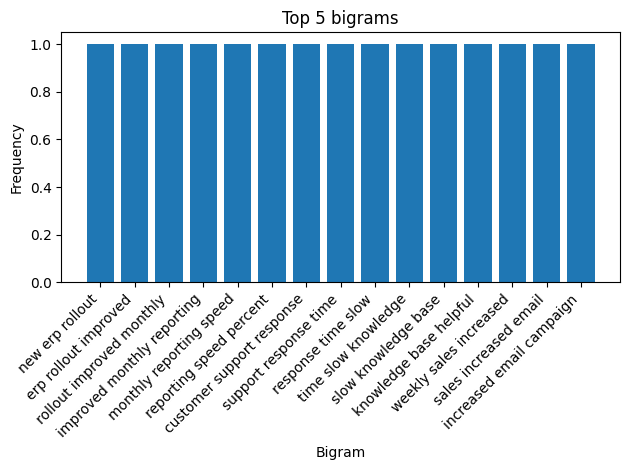

In [26]:
plot_bar(top_tri, "Top 5 bigrams", "Bigram", "Frequency")

## 5) KWIC — Keyword in Context

KWIC prints each occurrence of a keyword together with a few words around it (the *context window*). It lets you inspect *how* a word is used.

**Task:** implement `kwic(term, window=3)` and try words like `wants`, `search`, `weekly`. 

In [27]:
def kwic(term, window=3):
    term = term.lower()
    for sent in texts:
        cleaned = clean_text(sent)
        toks = cleaned.split()
        for i,t in enumerate(toks):
            if t == term:
                left = ' '.join(toks[max(0,i-window):i])
                right = ' '.join(toks[i+1:i+1+window])
                print(f"... {left} [{t}] {right} ...")


In [28]:
kwic('wants')

... marketing [wants] a way to ...
... finance [wants] to compare actuals ...
... the bi team [wants] ownership of all ...
... accounting [wants] to tag expenses ...
... the logistics team [wants] a daily sms ...
... security [wants] automated alerts for ...
... revenue operations [wants] one source of ...
... qa [wants] a daily digest ...
... the team [wants] to track trial ...
... finance [wants] bank feeds to ...
... the seo team [wants] to compare rankings ...
... customer success [wants] churn risk scores ...
... legal [wants] a tool to ...
... it [wants] a report of ...
